In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from fbprophet import Prophet
import datetime

from pandas import read_csv
#from pandas import datetime
from matplotlib import pyplot
import pmdarima as pm

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [2]:
#SARIMAX function can fit all the models in the family
from statsmodels.tsa.arima_process import ArmaProcess
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_model import ARMA
import sklearn.metrics as skmetrics
import warnings
from statsmodels.tsa.stattools import arma_order_select_ic
from tqdm import tqdm #A tqdm progress bar shows you how much time has elapsed and the estimated time remaining for the iterable
#import pmdarima as pm
warnings.filterwarnings("ignore")

In [3]:
df_zill_cal = read_csv('zillow-carlifornia.csv', header=0, index_col=0, parse_dates=True,squeeze=True)

In [4]:
test = read_csv('test.csv', header=0, index_col=0, parse_dates=True,squeeze=True)

In [5]:
test.head()

Month
2016-01-31    476250
2016-02-29    466000
2016-03-31    485000
2016-04-30    501000
2016-05-31    501000
Name: Median House Price, dtype: int64

In [6]:
df_zill_cal.head()

,MedianSoldPrice_AllHomes.California,MedianMortageRate,UnemploymentRate
Date,,,
2008-02-29,470000.0,5.29,6.3
2008-03-31,441000.0,5.44,6.2
2008-04-30,460000.0,5.42,6.4
2008-05-31,429000.0,5.47,6.3
2008-06-30,437500.0,5.60,6.2


In [7]:
df_zill_cal.info()  
## No nulls

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 107 entries, 2008-02-29 to 2016-12-31
Data columns (total 3 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   MedianSoldPrice_AllHomes.California  95 non-null     float64
 1   MedianMortageRate                    107 non-null    float64
 2   UnemploymentRate                     107 non-null    float64
dtypes: float64(3)
memory usage: 3.3 KB


In [8]:
df_zill_cal.shape

(107, 3)

In [9]:
df_zill_cal.describe()

,MedianSoldPrice_AllHomes.California,MedianMortageRate,UnemploymentRate
count,95.000000,107.000000,107.000000
mean,399105.263158,4.186542,6.823364
std,45971.423521,0.636049,1.183979
min,335000.000000,3.290000,4.700000
25%,360125.000000,3.780000,6.100000
50%,375000.000000,4.060000,7.000000
75%,440000.000000,4.430000,7.650000
max,489000.000000,6.030000,9.100000


In [10]:
df_zill_cal=df_zill_cal.reset_index()

In [11]:
df_zill_cal.tail()

,Date,MedianSoldPrice_AllHomes.California,MedianMortageRate,UnemploymentRate
102,2016-08-31,NaN,3.46,4.8
103,2016-09-30,NaN,3.42,5.0
104,2016-10-31,NaN,3.36,5.0
105,2016-11-30,NaN,3.47,4.8
106,2016-12-31,NaN,4.07,4.7


In [12]:
df_zill_cal["Date"].max(),df_zill_cal["Date"].min()

(Timestamp('2016-12-31 00:00:00'), Timestamp('2008-02-29 00:00:00'))

In [13]:
df_zill_cal["Date"]=pd.to_datetime(df_zill_cal["Date"])

In [14]:
df_zill_cal["Date"].dtype

dtype('<M8[ns]')

In [15]:
## This is a time series monthly data (with Date as last date of the month )from from 2008 to 2016 for 107 months. We will be using data upto 2015 for entire analysis and forecast sold price for 2016 as mentioned.
##There are no-nulls in data,. The houses prices vary from 335k to 489K. 

In [16]:
df_zill_cal["Date"]=pd.to_datetime(df_zill_cal['Date'])
df_zill_cal['yearmonth'] = df_zill_cal['Date'].map(lambda x: 100*x.year + x.month)
#df_zill_cal_train=df_zill_cal_train.set_index('Date')

In [17]:
df_zill_cal.head()

,Date,MedianSoldPrice_AllHomes.California,MedianMortageRate,UnemploymentRate,yearmonth
0,2008-02-29,470000.0,5.29,6.3,200802
1,2008-03-31,441000.0,5.44,6.2,200803
2,2008-04-30,460000.0,5.42,6.4,200804
3,2008-05-31,429000.0,5.47,6.3,200805
4,2008-06-30,437500.0,5.60,6.2,200806


In [18]:
df_zill_cal_train=df_zill_cal[df_zill_cal["Date"]<='2015-12-31 00:00:00']
df_zill_cal_test=df_zill_cal[df_zill_cal["Date"]>'2015-12-31 00:00:00']

In [19]:
df_zill_cal_train.shape
df_zill_cal_train=df_zill_cal_train.set_index('Date')

In [20]:
df_zill_cal_train.head()

,MedianSoldPrice_AllHomes.California,MedianMortageRate,UnemploymentRate,yearmonth
Date,,,,
2008-02-29,470000.0,5.29,6.3,200802
2008-03-31,441000.0,5.44,6.2,200803
2008-04-30,460000.0,5.42,6.4,200804
2008-05-31,429000.0,5.47,6.3,200805
2008-06-30,437500.0,5.60,6.2,200806


In [21]:
#df_zill_cal_train=df_zill_cal_train.reset_index()

In [22]:
from matplotlib.dates import DateFormatter

In [23]:
df_zill_cal_train.tail()

,MedianSoldPrice_AllHomes.California,MedianMortageRate,UnemploymentRate,yearmonth
Date,,,,
2015-08-31,475000.0,3.95,5.2,201508
2015-09-30,470000.0,3.87,5.1,201509
2015-10-31,470000.0,3.80,5.0,201510
2015-11-30,485750.0,3.69,5.0,201511
2015-12-31,485000.0,3.89,5.1,201512


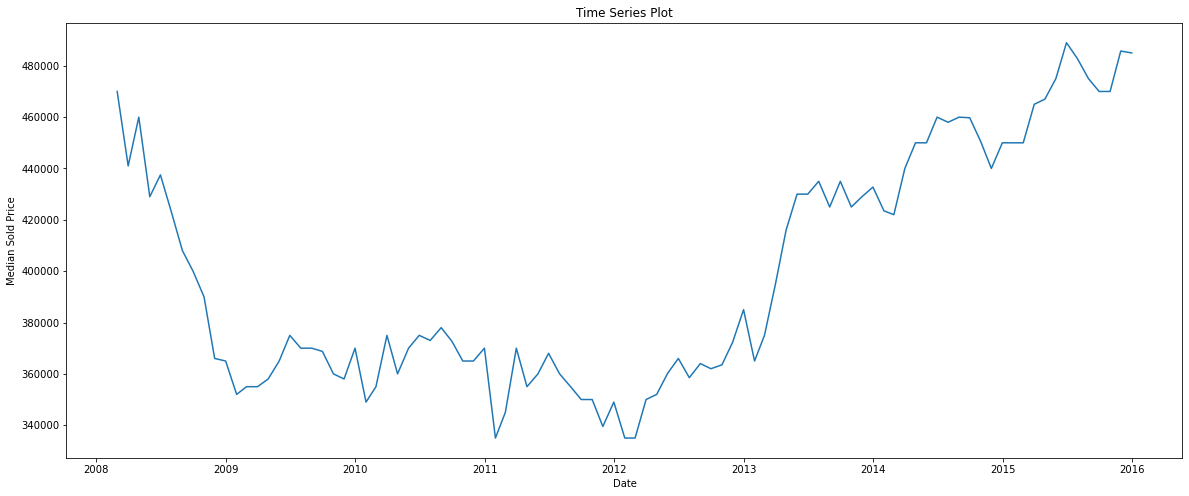

In [24]:
#Time Series Plot
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(df_zill_cal_train.index.values,
       df_zill_cal_train['MedianSoldPrice_AllHomes.California'])

ax.set(xlabel="Date",
       ylabel="Median Sold Price",
       title="Time Series Plot")

#date_form = DateFormatter("%m/%d")
#ax.xaxis.set_major_formatter(date_form)

plt.show()
#pyplot.show()

In [25]:
## As we there is slight increase in prices , so there is base trend . We can't comment on seasonality by looking at plots though.

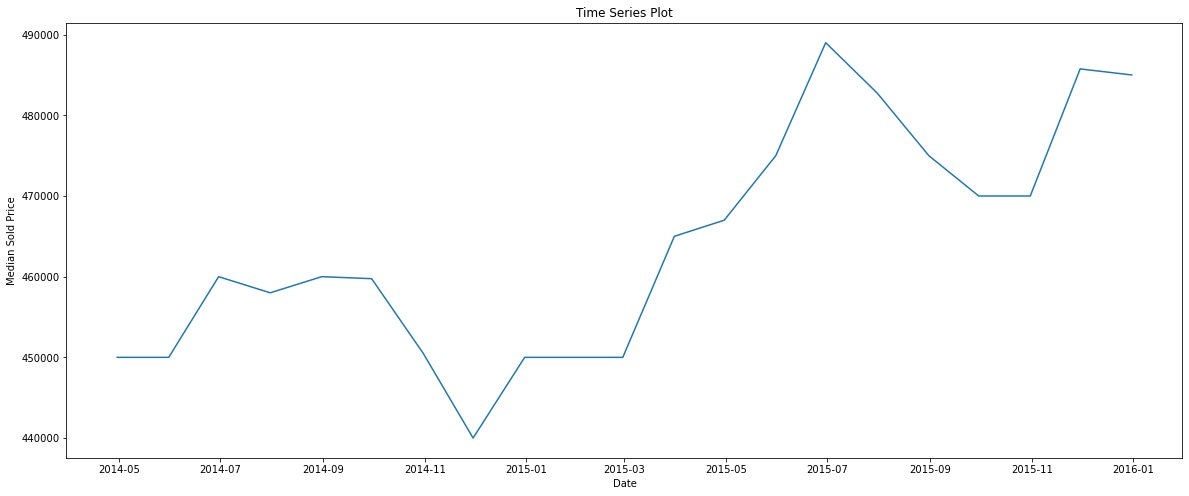

In [26]:
##recent plot

#Time Series Plot
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(df_zill_cal_train.index.values[74:],
       df_zill_cal_train['MedianSoldPrice_AllHomes.California'][74:])

ax.set(xlabel="Date",
       ylabel="Median Sold Price",
       title="Time Series Plot")

#date_form = DateFormatter("%m/%d")
#ax.xaxis.set_major_formatter(date_form)

plt.show()
#pyplot.show()

In [27]:
# define all the functions we will need 

# trend and seasonal differencing
def diff(data, interval=1):
    diff = list()
    for i in range(interval, len(data)):
        value = data[i] - data[i - interval]
        diff.append(value)
    return diff
#trend differencing once: interval=1
#trend differencing twice: d1=diff(data, interval=1); d2=diff(d1 interval=1)
#seasonal differencing: interval=m

#Define ADF test
#Perform from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Augmented Dickey-Fuller test:
    print ('Results of Augmented Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)


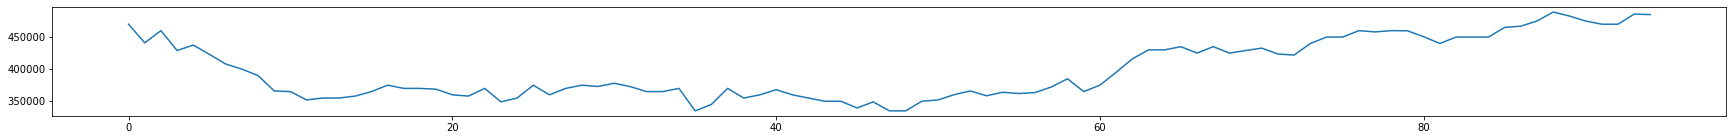

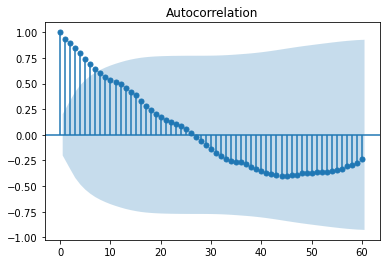

<function matplotlib.pyplot.show(close=None, block=None)>

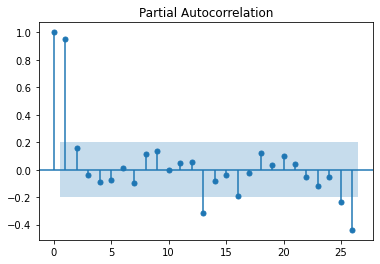

In [28]:
##ACF PLOT WITHOUT ANY DIFFERENCING
x=np.array(df_zill_cal_train['MedianSoldPrice_AllHomes.California'])
fig = plt.figure(figsize=(30, 2))
ax = fig.add_subplot(111)
ax.plot(x)
plt.show()
plot_acf(x,lags=60) 
plt.show()
plot_pacf(x,lags=26) 
plt.show

In [29]:
dftest = adfuller(x)
dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
print (dfoutput)

Test Statistic   -0.058792
p-value           0.953391
dtype: float64


In [30]:
# The TS is not stationary. hence , let's dry differencing once mediansoldprice.

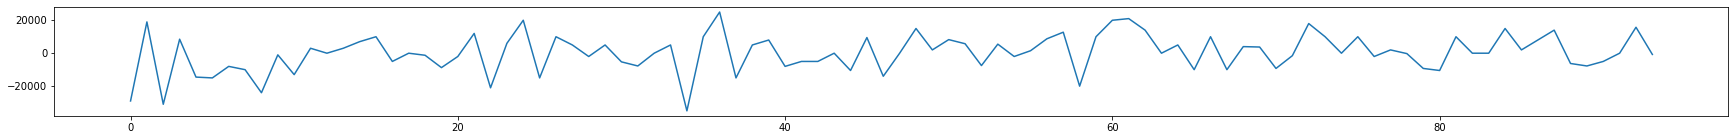

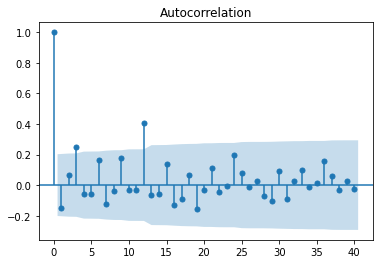

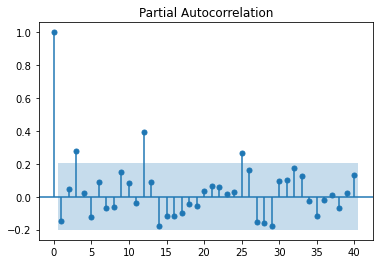

In [31]:
fig = plt.figure(figsize=(30, 2))
ax = fig.add_subplot(111)
d1 = diff(x, 1)
plt.plot(d1)
plot_acf(d1,lags=40) 
plt.show()
plot_pacf(d1,lags=40) 
plt.show()

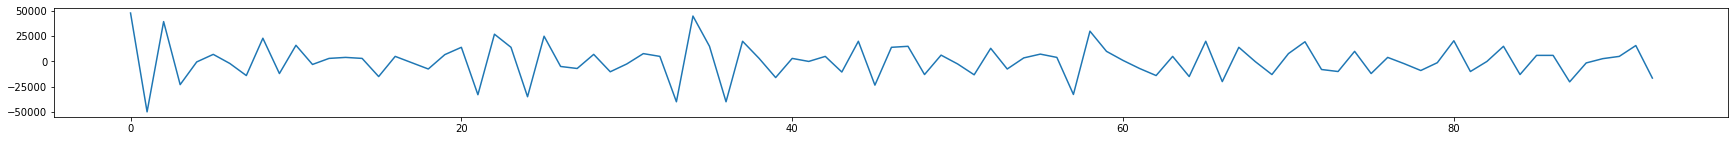

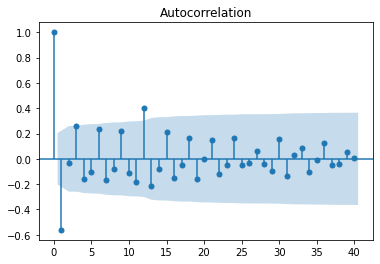

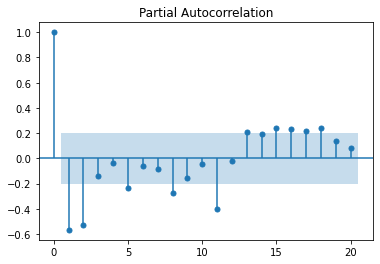

In [32]:
fig = plt.figure(figsize=(30, 2))
ax = fig.add_subplot(111)
d2 = diff(d1, 1)
plt.plot(d2)
plot_acf(d2,lags=40) 
plt.show()
plot_pacf(d2,lags=20) 
plt.show()

In [33]:
dftest = adfuller(d1)
dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
print (dfoutput)

Test Statistic   -3.088139
p-value           0.027443
dtype: float64


In [237]:
# As we see now both correlation plots are shutting off now, Hence D=1 is suitable.We can also see slight peaks in correlation after every 12 lags. 
#But can't say with confidence, So we will try both seasonal_decompose function to decide itself in which we can see below seasonality repeats every year=12 months..



<Figure size 2160x144 with 0 Axes>

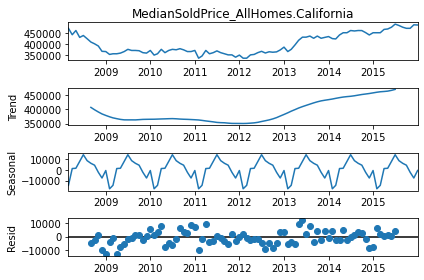

In [238]:
from statsmodels.tsa.seasonal import seasonal_decompose
fig = plt.figure(figsize=(30, 2))
result = seasonal_decompose(df_zill_cal_train['MedianSoldPrice_AllHomes.California'], model='additive')
fig = result.plot()

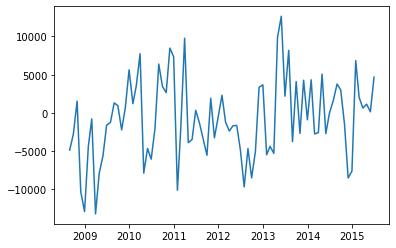

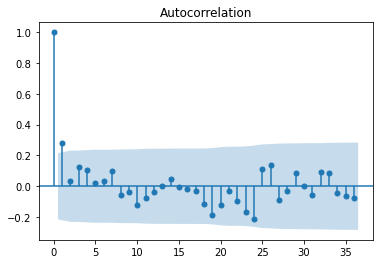

In [239]:

resid_val = result.resid[~np.isnan(result.resid)]
plt.plot(resid_val)
plot_acf(resid_val,lags=36) 
plt.show()

In [240]:
dftest = adfuller(resid_val)
dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
print (dfoutput)

Test Statistic   -6.642682e+00
p-value           5.360619e-09
dtype: float64


<Figure size 2160x144 with 0 Axes>

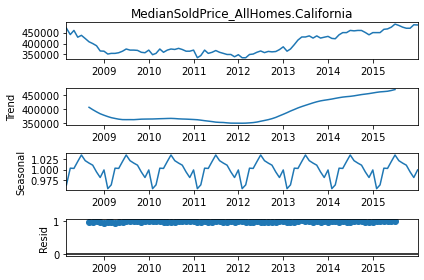

In [241]:
from statsmodels.tsa.seasonal import seasonal_decompose
fig = plt.figure(figsize=(30, 2))
result1 = seasonal_decompose(df_zill_cal_train['MedianSoldPrice_AllHomes.California'], model='multiplicative')
fig = result1.plot()

In [242]:
# Seasonality as we see is m=12 each year.
#So, in our candidates we have d=1 and seasonality i.e. m=12

In [243]:
##CREATING CV model for ETS models 

In [40]:
def evaluate_ets_model(X, trend_type, seasonal_type,damp,m):
    train_size = int(len(X) * 0.8)
    train, test = X[0:train_size], X[train_size:]
    #print(np.mean(test))
    
    predictions = list()
    for t in range(len(test)):
        model = ExponentialSmoothing(X[:train_size+t], trend=trend_type, seasonal=seasonal_type, seasonal_periods=m,damped=damp) #rolling forward for one step at each time
        model_fit = model.fit()
        yhat = np.asanyarray(model_fit.forecast())[0] #predict one step
        predictions.append(yhat) #store prediction
        # calculate out of sample error
    predictions = np.asarray(predictions).reshape(-1,)
    test = np.asanyarray(test).reshape(-1,)
    #mae = skmetrics.mean_absolute_error(test, predictions)
    rmse = np.sqrt(skmetrics.mean_squared_error(test, predictions))
    mape = np.mean(np.abs(test-predictions)/test)
    return rmse


In [41]:
##Trying all combinations of trend and seasonality and choose best model based on lowest mape.

In [42]:
trends=['additive', 'multiplicative', None]
seasons=['additive', 'multiplicative',None]

x=np.array(df_zill_cal_train['MedianSoldPrice_AllHomes.California'])
list_df=[]
for i in trends:
    for j in seasons:
        if i is None:
            print(i,j)
            rmse_1=evaluate_ets_model(x,i,j,False,12)
            list_df.append((i,j,rmse_1))
        else:
            print(i,j)
            rmse_1=evaluate_ets_model(x,i,j,True,12)
            list_df.append((i,j,rmse_1))

additive additive
additive multiplicative
additive None
multiplicative additive
multiplicative multiplicative
multiplicative None
None additive
None multiplicative
None None


In [43]:
pd.DataFrame(list_df,columns=['Trend','Seasons','RMSE'])

## The lowest rmse is for 

,Trend,Seasons,RMSE
0,additive,additive,1.113632e+04
1,additive,multiplicative,2.009016e+04
2,additive,None,9.183456e+03
3,multiplicative,additive,1.071605e+04
4,multiplicative,multiplicative,8.021984e+46
5,multiplicative,None,9.066876e+03
6,None,additive,1.033950e+04
7,None,multiplicative,1.075915e+04
8,None,None,8.344539e+03


In [191]:
##BEST MODEL: RMSE is 9.066876e+03 . Model: multiplicative Trend and no seasons

In [192]:
df_zill_cal_train.head()

,MedianSoldPrice_AllHomes.California,MedianMortageRate,UnemploymentRate,yearmonth
Date,,,,
2008-02-29,470000.0,5.29,6.3,200802
2008-03-31,441000.0,5.44,6.2,200803
2008-04-30,460000.0,5.42,6.4,200804
2008-05-31,429000.0,5.47,6.3,200805
2008-06-30,437500.0,5.60,6.2,200806


In [193]:
df_zill_cal_train=df_zill_cal_train[['MedianSoldPrice_AllHomes.California','UnemploymentRate','MedianMortageRate']]

In [194]:
##CHECK FEASIBILITY FOR VAR

In [197]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=11
test_stats = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test_stats][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df



In [198]:
grangers_causation_matrix(df_zill_cal_train, variables = df_zill_cal_train.columns) 

,MedianSoldPrice_AllHomes.California_x,UnemploymentRate_x,MedianMortageRate_x
MedianSoldPrice_AllHomes.California_y,1.0000,0.0000,0.0
UnemploymentRate_y,0.0000,1.0000,0.0
MedianMortageRate_y,0.0619,0.1753,1.0


In [199]:
#The data is good fit for VAR as we can see from grangers test that each of the variables 
#has causation with other variables, p-value<0.05.

In [200]:
#VAR

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))

train_soldprice = sc.fit_transform(np.array(df_zill_cal_train['MedianSoldPrice_AllHomes.California']).reshape(-1, 1) )
train_unemploymentrate = sc.fit_transform(np.array(df_zill_cal_train['UnemploymentRate']).reshape(-1, 1) )
#train_mortgage = sc.fit_transform(np.array(df_zill_cal_train['MedianMortageRate']).reshape(-1, 1) )
#test_soldprice = sc.transform(test.iloc[:,1:].values )

NameError: name 'train_mortgage' is not defined

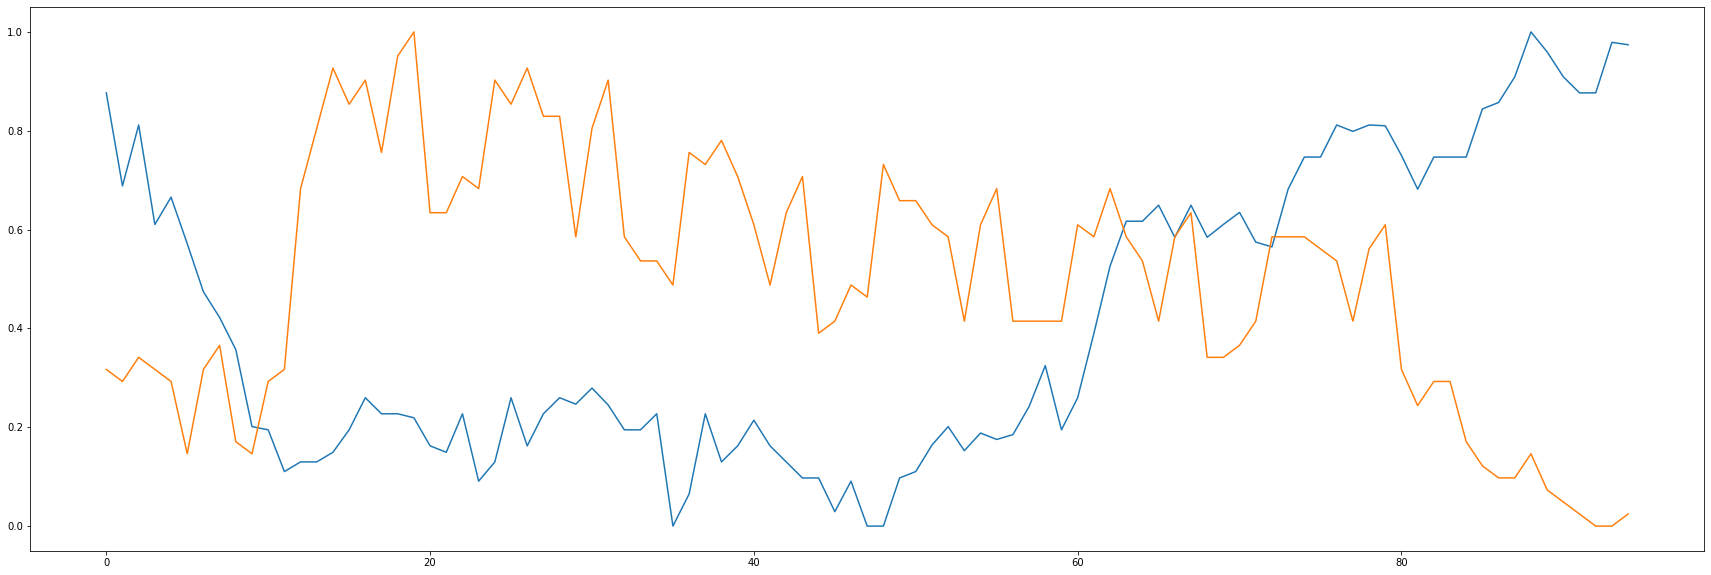

In [201]:
fig = plt.figure(figsize=(30, 10))
plt.plot(train_soldprice, label='soldprice')
plt.plot(train_unemploymentrate, label='UnemploymentRate')
plt.plot(train_mortgage, label='MedianMortageRate')
plt.legend(loc='upper left', fontsize=12)
plt.show()

In [ ]:
##We are going to use all variables in VAR as all looks to be interactive from time series plot. 
## Unemployment rate follows the opposite pattern with price while Mortgage Rate has similar trend with lag .

In [202]:
#Correlation
df_zill_cal_train['MedianSoldPrice_AllHomes.California'].corr(df_zill_cal_train['UnemploymentRate'])
##good correlation

-0.6463023469469523

In [203]:
#Correlation
df_zill_cal_train['MedianSoldPrice_AllHomes.California'].corr(df_zill_cal_train['MedianMortageRate'])

-0.008397113331328098

In [2061]:
## We can include all three variable in VAR as all varies with trend.

In [2147]:
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

In [2148]:
df_zill_cal_train.head()

,MedianSoldPrice_AllHomes.California,UnemploymentRate
Date,,
2008-02-29,470000.0,6.3
2008-03-31,441000.0,6.2
2008-04-30,460000.0,6.4
2008-05-31,429000.0,6.3
2008-06-30,437500.0,6.2


In [2149]:
df_zill_cal_train.shape

(95, 2)

In [2065]:
#As we VAR needs stationarity of time series , we can check by ADF test for each variables.

In [2066]:
from statsmodels.tsa.stattools import adfuller

In [2150]:
#VAR assumes stationary, check it first
from statsmodels.tsa.stattools import adfuller
dftest1 = adfuller(df_zill_cal_train['MedianSoldPrice_AllHomes.California'], autolag='AIC')
dfoutput1 = pd.Series(dftest1[0:2], index=['Test Statistic','p-value'])
#dftest2 = adfuller(df_zill_cal_train['MedianMortageRate'], autolag='AIC')
#dfoutput2 = pd.Series(dftest2[0:2], index=['Test Statistic','p-value'])
dftest3 = adfuller(df_zill_cal_train['UnemploymentRate'], autolag='AIC')
dfoutput3 = pd.Series(dftest3[0:2], index=['Test Statistic','p-value'])
print (dfoutput1)
#print (dfoutput2)
print (dfoutput3)
#differencing required

Test Statistic   -0.058792
p-value           0.953391
dtype: float64
Test Statistic   -1.481369
p-value           0.542707
dtype: float64


In [2068]:
## As we can see all three variables are non-stationary as p-value >0.05 . Hence, need to difference each one.

In [2151]:
df_zill_cal_train_diff=df_zill_cal_train.diff().dropna()

In [2152]:
df_zill_cal_train_diff.head()

,MedianSoldPrice_AllHomes.California,UnemploymentRate
Date,,
2008-03-31,-29000.0,-0.1
2008-04-30,19000.0,0.2
2008-05-31,-31000.0,-0.1
2008-06-30,8500.0,-0.1
2008-07-31,-14500.0,-0.6


In [2153]:
from statsmodels.tsa.stattools import adfuller
dftest1 = adfuller(df_zill_cal_train_diff['MedianSoldPrice_AllHomes.California'], autolag='AIC')
dfoutput1 = pd.Series(dftest1[0:2], index=['Test Statistic','p-value'])
#dftest2 = adfuller(df_zill_cal_train_diff['MedianMortageRate'], autolag='AIC')
#dfoutput2 = pd.Series(dftest2[0:2], index=['Test Statistic','p-value'])
dftest3 = adfuller(df_zill_cal_train_diff['UnemploymentRate'], autolag='AIC')
dfoutput3 = pd.Series(dftest3[0:2], index=['Test Statistic','p-value'])
print (dfoutput1)
#print (dfoutput2)
print (dfoutput3)

Test Statistic   -3.088139
p-value           0.027443
dtype: float64
Test Statistic   -1.782534
p-value           0.389167
dtype: float64


In [2072]:
## As we can see aPrice and mortgage rate has become stationary but Unemployment hasn't. hence, will difference all variables once again to make it stationary

In [2154]:
df_zill_cal_train_diff=df_zill_cal_train_diff.diff().dropna()
#df_zill_cal_train_diff['UnemploymentRate']=df_zill_cal_train_diff['UnemploymentRate'].diff()

In [2155]:
from statsmodels.tsa.stattools import adfuller
dftest1 = adfuller(df_zill_cal_train_diff['MedianSoldPrice_AllHomes.California'], autolag='AIC')
dfoutput1 = pd.Series(dftest1[0:2], index=['Test Statistic','p-value'])
#dftest2 = adfuller(df_zill_cal_train_diff['MedianMortageRate'], autolag='AIC')
#dfoutput2 = pd.Series(dftest2[0:2], index=['Test Statistic','p-value'])
dftest3 = adfuller(df_zill_cal_train_diff['UnemploymentRate'], autolag='AIC')
dfoutput3 = pd.Series(dftest3[0:2], index=['Test Statistic','p-value'])
print (dfoutput1)
#print (dfoutput2)
print (dfoutput3)

Test Statistic   -7.390432e+00
p-value           8.027576e-11
dtype: float64
Test Statistic   -1.249864e+01
p-value           2.838908e-23
dtype: float64


In [2156]:
df_zill_cal_train_diff.head()

,MedianSoldPrice_AllHomes.California,UnemploymentRate
Date,,
2008-04-30,48000.0,3.000000e-01
2008-05-31,-50000.0,-3.000000e-01
2008-06-30,39500.0,8.881784e-16
2008-07-31,-23000.0,-5.000000e-01
2008-08-31,-500.0,1.300000e+00


In [2157]:
df_zill_cal_train_diff.shape

(93, 2)

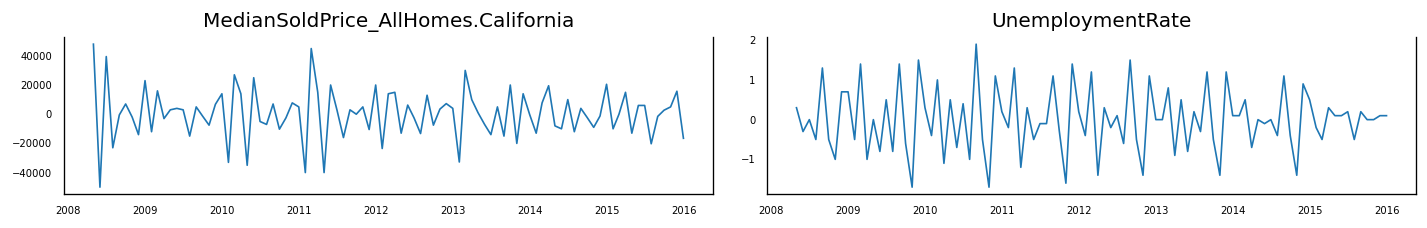

In [2159]:
fig, axes = plt.subplots(nrows=1, ncols=2, dpi=120, figsize=(12,2))
for i, ax in enumerate(axes.flatten()):
    data = df_zill_cal_train_diff[df_zill_cal_train_diff.columns[i]]
    ax.plot(data, linewidth=1)
    # Decorations
    ax.set_title(df_zill_cal_train_diff.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [2160]:
## As we can see all data looks stationary now

In [2161]:
df_zill_cal_train_diff.head()

,MedianSoldPrice_AllHomes.California,UnemploymentRate
Date,,
2008-04-30,48000.0,3.000000e-01
2008-05-31,-50000.0,-3.000000e-01
2008-06-30,39500.0,8.881784e-16
2008-07-31,-23000.0,-5.000000e-01
2008-08-31,-500.0,1.300000e+00


In [2163]:
model = VAR(df_zill_cal_train_diff)
for i in range(1,20):
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  18.280637111089785
BIC :  18.445101583506027
FPE :  86936052.03060885
HQIC:  18.347016365671703 

Lag Order = 2
AIC :  17.87590179051741
BIC :  18.151820417607176
FPE :  58009848.81010315
HQIC:  17.987217771462152 

Lag Order = 3
AIC :  17.705560970214496
BIC :  18.09442025226587
FPE :  48944159.32003379
HQIC:  17.862371890338828 

Lag Order = 4
AIC :  17.363827009567053
BIC :  17.86714672479378
FPE :  34803005.83341173
HQIC:  17.566700742871713 

Lag Order = 5
AIC :  17.23630596884257
BIC :  17.85564017246212
FPE :  30674272.30079476
HQIC:  17.485820173148017 

Lag Order = 6
AIC :  17.115989789672664
BIC :  17.852927848121162
FPE :  27248221.906724952
HQIC:  17.412732021208637 

Lag Order = 7
AIC :  17.05247671690029
BIC :  17.90864437838407
FPE :  25640497.110030938
HQIC:  17.397044535371176 

Lag Order = 8
AIC :  16.76913469665204
BIC :  17.746195199248167
FPE :  19386062.012688864
HQIC:  17.16213575911061 

Lag Order = 9
AIC :  16.7682886088523
BIC :  17.867943

In [2165]:
x = model.select_order(maxlags=20)
x.summary()

,AIC,BIC,FPE,HQIC
0,18.94,19.01,1.685e+08,18.97
1,18.36,18.54,9.377e+07,18.43
2,17.83,18.15,5.566e+07,17.96
3,17.68,18.12,4.786e+07,17.86
4,17.35,17.91,3.431e+07,17.57
5,17.17,17.86,2.874e+07,17.44
6,16.90,17.71,2.196e+07,17.22
7,16.86,17.80,2.128e+07,17.24
8,16.52,17.59,1.526e+07,16.95
9,16.59,17.78,1.641e+07,17.06


In [2082]:
#choosing maximu lags=11,12 as candidate models as lower aic/bic

In [2166]:
# inverting transformation
def invert_transformation(dt_train, dt_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    dt_fc = dt_forecast.copy()
    columns = dt_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            dt_fc[str(col)+'_1d'] = (dt_train[col].iloc[-1]-dt_train[col].iloc[-2]) + dt_fc[str(col)+'_1d'].cumsum()
        # Roll back 1st Diff
        dt_fc[str(col)+'_forecast'] = dt_train[col].iloc[-1] + dt_fc[str(col)+'_1d'].cumsum()
    return dt_fc


In [2167]:
df_zill_cal_train_diff.shape

(93, 2)

In [2168]:
def evaluate_var_model(X, lag):
    train_size = int(len(X) * 0.8)
    train, test_1 = X[0:train_size], X[train_size:]
    
    
    predictions = list()
    for t in range(len(test_1)):
        model = VAR(X[:train_size+t]) #rolling forward for one step at each time
        model_fit = model.fit(maxlags=lag, ic='aic')
        yhat = model_fit.forecast(model_fit.y, steps=1)[0]
        dt_forecast = pd.DataFrame(yhat).T
        dt_forecast.columns=df_zill_cal_train.columns + '_1d'
        dt_results = invert_transformation(df_zill_cal_train, dt_forecast, second_diff=False)
        predictions.append(dt_results['MedianSoldPrice_AllHomes.California_forecast'][0])
        # calculate out of sample error
    predictions = np.asarray(predictions).reshape(-1,)
    #test = np.asanyarray(test).reshape(-1,)
    #mae = skmetrics.mean_absolute_error(test, predictions)
    new_test=df_zill_cal_train[train_size+2:]
    rmse = np.sqrt(skmetrics.mean_squared_error(new_test['MedianSoldPrice_AllHomes.California'], predictions))
    mape = np.mean(np.abs(new_test['MedianSoldPrice_AllHomes.California']-predictions)/new_test['MedianSoldPrice_AllHomes.California'])
    return rmse


In [2169]:
evaluate_var_model(df_zill_cal_train_diff,11)

26928.115807339833

In [2170]:
evaluate_var_model(df_zill_cal_train_diff,12)

27268.225580951785

In [44]:
##Final Model

#df_zill_cal_train['MedianSoldPrice_AllHomes.California']

In [95]:
model = ExponentialSmoothing(df_zill_cal_train["MedianSoldPrice_AllHomes.California"], trend="mul", seasonal=None, seasonal_periods=7,damped=True)
fit = model.fit()
pred = fit.forecast(12)

In [96]:
#df_zill_cal_test=df_zill_cal_test.set_index("Date")

In [97]:
ser_pred=pd.Series(pred)
ser_pred.index = df_zill_cal_test.index

In [98]:
ser_pred

Date
2016-01-31    487464.444502
2016-02-29    489864.297222
2016-03-31    492251.789389
2016-04-30    494626.868606
2016-05-31    496989.485115
2016-06-30    499339.591755
2016-07-31    501677.143931
2016-08-31    504002.099578
2016-09-30    506314.419119
2016-10-31    508614.065433
2016-11-30    510901.003818
2016-12-31    513175.201954
dtype: float64

In [99]:
rmse = np.sqrt(skmetrics.mean_squared_error(test, ser_pred))

In [100]:
rmse

9813.02758042555

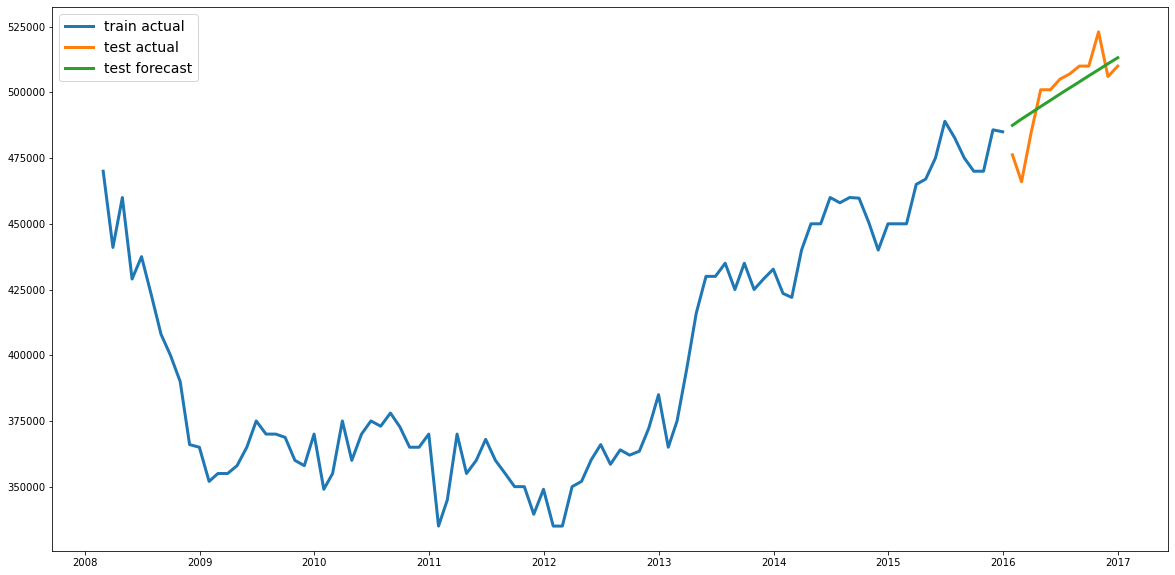

In [116]:
fig = plt.figure(figsize=(20, 10))
plt.plot(df_zill_cal_train["MedianSoldPrice_AllHomes.California"], label='train actual',linewidth=3)
plt.plot(test, label='test actual',linewidth=3)
plt.plot(ser_pred, label='test forecast',linewidth=3)
plt.legend(loc='upper left', fontsize=14)
plt.show()